# Google Cloud & NCAA® ML Competition 2018-Women's

Google Cloud and NCAA® have teamed up to bring you this year’s version of the Kaggle machine learning competition. Another year, another chance to anticipate the upsets, call the probabilities, and put your bracketology skills to the leaderboard test. Kagglers will join the millions of fans who attempt to forecast the outcomes of March Madness® during this year's NCAA Division I Men’s and Women’s Basketball Championships. But unlike most fans, you will pick your bracket using a combination of NCAA’s historical data and your computing power, while the ground truth unfolds on national television

Before digging more deep I will import the basic libraries and datasets that are given to us.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from xgboost import XGBClassifier

# metrics,model selection
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import log_loss

## What to predict
Stage 1 - You should submit predicted probabilities for every possible matchup in the past 4 NCAA® tournaments (2014-2017).

Stage 2 - You should submit predicted probabilities for every possible matchup before the 2018 tournament begins.


Refer to the Timeline page for specific dates. In both stages, the sample submission will tell you which games to predict.

The main problem at first is how to build a ML model as there are more number of files. So at first we must know how to handle these files and then we can do all other stuff then.

As it's my first time it will take time for building the first model and by building this basic model we can understand how to generate new features which will be useful in future.

Before digging deep we have to understand what each file means. The total data section in kaggle website  https://www.kaggle.com/c/womens-machine-learning-competition-2018/data is copied here. So that in future we can see easily see here rather by visiting the webpage again and again.

## DESCRIPTION Of THE DATA
Each season there are thousands of NCAA® basketball games played between Division I women's teams, culminating in March Madness®, the 68-team national championship that starts in the middle of March. We have provided a large amount of historical data about college basketball games and teams, going back many years. Armed with this historical data, you can explore it and develop your own distinctive ways of predicting March Madness® game outcomes. You can even evaluate and compare different approaches by seeing which of them would have done best at predicting tournament games from the past.

If you are unfamiliar with the format and intricacies of the tournament, we encourage reading the wikipedia page before diving into the data. The data description and schema may seem daunting at first, but is not as complicated as it appears.

As a reminder, you are encouraged to incorporate your own sources of data. We have provided extensive historical data to jump-start the modeling process, and this data is self-consistent (for instance, dates and team ID's are always treated the same way). Nevertheless, you may also be able to make productive use of external data. If you head down this path, please be forewarned that many sources have their own distinctive way of identifying the names of teams, and this can make it challenging to link up with our data. The WTeamSpellings file, which is listed in the bottom section below, may help you map external team references into our own Team ID structure, and you may also need to understand exactly how dates work in our data.

Please also note that we have standardized the spelling of column names and some filenames, and we have assigned a "W" prefix to all files pertinent to women's college basketball, so if you are re-using code from previous instances of this contest, or from the men's contest, you may need to adjust for this.

We extend our gratitude to Kenneth Massey for providing much of the historical data.

Special Acknowledgment to Jeff Sonas of Sonas Consulting for his support in assembling the dataset for this competition.

### What to predict
Stage 1 - You should submit predicted probabilities for every possible matchup in the past 4 NCAA® tournaments (2014-2017).

Stage 2 - You should submit predicted probabilities for every possible matchup before the 2018 tournament begins.

Refer to the Timeline page for specific dates. In both stages, the sample submission will tell you which games to predict.


A smaller log loss is better. Games which are not played are ignored in the scoring. The use of the logarithm provides extreme punishments for being both confident and wrong. In the worst possible case, a prediction that something is true when it is actually false will add infinite to your error score. In order to prevent this, predictions are bounded away from the extremes by a small value.


# File descriptions
Below we describe the format and fields of the contest data files. The data will likely be refreshed once in late February while Stage 1 of the competition is running. At the start of Stage 2, we will provide updates to these files to incorporate data from the current season.

## Data Section 1 - The Basics
This section provides everything you need to build a simple prediction model and submit predictions.

Team ID's and Team Names

Tournament seeds since 1997-98 season

Final scores of all regular season, conference tournament, and NCAA® tournament games since 1997-98 season

Season-level details including dates and region names

Example submission file for stage 1

Special note about "Season" numbers: the college basketball season lasts from early November until the national championship tournament that starts in the middle of March. For instance, this year the first women’s Division I games were played on November 10th, 2017 and the women’s national championship game will be played on April 1st, 2018. Because a basketball season spans two calendar years like this, it can be confusing to refer to the year of the season. By convention, when we identify a particular season, we will reference the year that the season ends in, not the year that it starts in. So for instance, the current season will be identified in our data as the 2018 season, not the 2017 season or the 2017-18 season or the 2017-2018 season, though you may see any of these in everyday use outside of our data.

### Data Section 1 file: WTeams.csv

This file identifies the different college teams present in the dataset. You will not see games present for all teams in all seasons, because the games listing is only for matchups where both teams are Division-I teams. There are 351 teams currently in Division-I, and an overall total of 364 teams in our team listing (each year, some teams might start being Division-I programs, and others might stop being Division-I programs). Each team has a 4 digit id number.

**TeamID** - a 4 digit id number, from 3000-3999, uniquely identifying each NCAA® women's team. A school's TeamID does not change from one year to the next, so for instance the Duke women's TeamID is 3181 for all seasons. To avoid possible confusion between the men's data and the women's data, all of the men's team ID's range from 1000-1999, whereas all of the women's team ID's range from 3000-3999.

**TeamName** - a compact spelling of the team's college name, 16 characters or fewer. There are no commas or double-quotes in the team names, but you will see some characters that are not letters or spaces, e.g., Texas A&M, St Mary's CA, TAM C. Christi, and Bethune-Cookman.

### Data Section 1 file: WSeasons.csv

This file identifies the different seasons included in the historical data, along with certain season-level properties.

**Season** - indicates the year in which the tournament was played

**DayZero** - tells you the date corresponding to daynum=0 during that season. All game dates have been aligned upon a common scale so that Selection Monday is on day 133. All game data includes the day number in order to make it easier to perform date calculations. If you really want to know the exact date a game was played on, you can combine the game's "daynum" with the season's "dayzero". For instance, since day zero during the 2011-2012 season was 10/31/2011, if we know that the earliest regular season games that year were played on daynum=7, they were therefore played on 11/07/2011.

**RegionW, RegionX, Region Y, Region Z** - by convention, the four regions in the final tournament are always named W, X, Y, and Z. Whichever region's name comes first alphabetically, that region will be Region W. And whichever Region plays against Region W in the national semifinals, that will be Region X. For the other two regions, whichever region's name comes first alphabetically, that region will be Region Y, and the other will be Region Z. This allows us to identify the regions and brackets in a standardized way in other files. For instance, during the 2012 tournament, the four regions were DesMoines, Fresno, Kingston, and Raleigh. Being the first alphabetically, DesMoines becomes W. Since the Fresno regional champion (Stanford) played against the DesMoines regional champion (Baylor) in the national semifinals, that makes Fresno be region X. For the other two (Kingston and Raleigh), since Kingston comes first alphabetically, that makes Kingston Y and therefore Raleigh is Z. So for that season, the W/X/Y/Z are DesMoines,Fresno,Kingston,Raleigh. And so for instance, Baylor, the #1 seed in the DesMoines, is listed in the WNCAATourneySeeds file with a seed of W01, meaning they were the #1 seed in the W region (the DesMoines region). We will not know the final W/X/Y/Z designations until Selection Monday, because the national semifinal pairings in the Final Four will depend upon the overall ranks of the four #1 seeds.
The game dates in this dataset are expressed in relative terms, as the number of days since the start of the regular season, and aligned for each season so that day number #133 is the Monday right before the tournament, when team selections are made. During any given season, day number zero is defined to be exactly 19 weeks earlier than Selection Monday, so Day #0 is a Monday in late October or early November such that Day #132 is Selection Sunday (for the men's tournament) and Day #133 is Selection Monday (for the women's tournament).

This doesn't necessarily mean that the regular season will always start exactly on Day #0; in fact, during the past decade, regular season games typically start being played on a Friday that is either Day #4 or Day #11, but further back there was more variety.

### Data Section 1 file: WNCAATourneySeeds.csv

This file identifies the seeds for all teams in each NCAA® tournament, for all seasons of historical data. Thus, there are between 64 rows for each year, since there are no play-in games in the women's tournament. We will not know the seeds of the respective tournament teams, or even exactly which 64 teams it will be, until Selection Monday on March 12, 2018.

**Season** - the year that the tournament was played in

**Seed** - this is a 3-character identifier of the seed, where the first character is either W, X, Y, or Z (identifying the region the team was in) and the next two digits (either 01, 02, ..., 15, or 16) tells you the seed within the region. For example, the first record in the file is seed W01, which means we are looking at the #1 seed in the W region (which we can see from the "WSeasons.csv" file was the East region).

**TeamID** - this identifies the id number of the team, as specified in the WTeams.csv file

### Data Section 1 file: WRegularSeasonCompactResults.csv

This file identifies the game-by-game results for many seasons of historical data, starting with the 1998 season. For each season, the file includes all games played from daynum 0 through 132. It is important to realize that the "Regular Season" games are simply defined to be all games played on DayNum=133 or earlier (DayNum=133 is Selection Monday). Thus a game played on or before Selection Monday will show up here whether it was a pre-season tournament, a non-conference game, a regular conference game, a conference tournament game, or whatever.

**Season** - this is the year of the associated entry in WSeasons.csv (the year in which the final tournament occurs)

**DayNum** - this integer always ranges from 0 to 133, and tells you what day the game was played on. It represents an offset from the "DayZero" date in the "WSeasons.csv" file. For example, the first game in the file was DayNum=18. Combined with the fact from the "WSeasons.csv" file that day zero was 10/27/1997 that year, this means the first game was played 18 days later, or 11/14/1997. There are no teams that ever played more than one game on a given date, so you can use this fact if you need a unique key (combining Season and DayNum and WTeamID).

**WTeamID** - this identifies the id number of the team that won the game, as listed in the "WTeams.csv" file. No matter whether the game was won by the home team or visiting team, or if it was a neutral-site game, the "WTeamID" always identifies the winning team.

**WScore** - this identifies the number of points scored by the winning team.

**LTeamID** - this identifies the id number of the team that lost the game.

**LScore** - this identifies the number of points scored by the losing team. Thus you can be confident that WScore will be greater than LScore for all games listed.

**NumOT** - this indicates the number of overtime periods in the game, an integer 0 or higher.

**WLoc** - this identifies the "location" of the winning team. If the winning team was the home team, this value will be "H". If the winning team was the visiting team, this value will be "A". If it was played on a neutral court, then this value will be "N". Sometimes it is unclear whether the site should be considered neutral, since it is near one team's home court, or even on their court during a tournament, but for this determination we have simply used the Kenneth Massey data in its current state, where the "@" sign is either listed with the winning team, the losing team, or neither team. If you would like to investigate this factor more closely, we invite you to explore Data Section 2, which provides the city that each game was played in, irrespective of whether it was considered to be a neutral site.

### Data Section 1 file: WNCAATourneyCompactResults.csv

This file identifies the game-by-game NCAA® tournament results for all seasons of historical data. The data is formatted exactly like the WRegularSeasonCompactResults data. Each season you will see 63 games listed, since there are no women's play-in games.

Under current tournament scheduling the men's round of 64 starts on Day #136 (Thursday) and the women's round of 64 starts on Day #137 (Friday), although from 2003-2014 the women's round of 64 started on Day #138 (Saturday). The scheduling of the women's Final Four games has also been adjusted a bit over the years. Currently the last two rounds are on days 151/153 (Friday/Sunday), just as they were from 1998-2002, whereas from 2003-2016 they were on days 153/155 (Sunday/Tuesday) instead.

Although the scheduling of the men's tournament rounds has been consistent for many years, there has been more variety in the scheduling of the women's rounds. There have been four different schedules over the course of the past 20 years for the women's tournament, as follows:

**2017 season and 2018 season**:

Round 1 = days 137/138 (Fri/Sat)

Round 2 = days 139/140 (Sun/Mon)

Round 3 = days 144/145 (Sweet Sixteen, Fri/Sat)

Round 4 = days 146/147 (Elite Eight, Sun/Mon)

National Seminfinal = day 151 (Fri)

National Final = day 153 (Sun)

**2015 season and 2016 season**:

Round 1 = days 137/138 (Fri/Sat)

Round 2 = days 139/140 (Sun/Mon)

Round 3 = days 144/145 (Sweet Sixteen, Fri/Sat)

Round 4 = days 146/147 (Elite Eight, Sun/Mon)

National Seminfinal = day 153 (Sun)

National Final = day 155 (Tue)

**2003 season through 2014 season**:

Round 1 = days 138/139 (Sat/Sun)

Round 2 = days 140/141 (Mon/Tue)

Round 3 = days 145/146 (Sweet Sixteen, Sat/Sun)

Round 4 = days 147/148 (Elite Eight, Mon/Tue)

National Seminfinal = day 153 (Sun)

National Final = day 155 (Tue)

**1998 season through 2002 season**:

Round 1 = days 137/138 (Fri/Sat)

Round 2 = days 139/140 (Sun/Mon)

Round 3 = day 145 only (Sweet Sixteen, Sat)

Round 4 = day 147 only (Elite Eight, Mon)

National Seminfinal = day 151 (Fri)

National Final = day 153 (Sun)

### Data Section 1 file: WSampleSubmissionStage1.csv

This file illustrates the submission file format for Stage 1. It is the simplest possible submission: a 50% winning percentage is predicted for each possible matchup.

A submission file lists every possible matchup between tournament teams for one or more years. During Stage 1, you are asked to make predictions for all possible matchups from the past four NCAA® tournaments (seasons 2014, 2015, 2016, and 2017). In Stage 2, you will be asked to make predictions for all possible matchups from the current NCAA® tournament (season 2018).

Since there are 64 teams in the tournament, there are 64*63/2=2,016 predictions to make for that year, so a Stage 1 submission file will have 2,016*4=8,064 data rows.

ID - this is a 14-character string of the format SSSS_XXXX_YYYY, where SSSS is the four digit season number, XXXX is the four-digit TeamID of the lower-ID team, and YYYY is the four-digit TeamID of the higher-ID team.
Pred - this contains the predicted winning percentage for the first team identified in the ID field
Example #1: You want to make a prediction for Duke (TeamID=3181) against Arizona (TeamID=3112) in the 2005 tournament, with Duke given a 53% chance to win and Arizona given a 47% chance to win. In this case, Arizona has the lower numerical ID so they would be listed first, and the winning percentage would be expressed from Arizona's perspective (47%):

2005_3112_3181,0.47

Example #2: You want to make a prediction for Duke (TeamID=3181) against North Carolina (TeamID=3314) in the 2005 tournament, with Duke given a 51.6% chance to win and North Carolina given a 48.4% chance to win. In this case, Duke has the lower numerical ID so they would be listed first, and the winning percentage would be expressed from Duke's perspective (51.6%):

2005_3181_3314,0.516

## Data Section 2 - Geography

This section provides city locations of all regular season, conference tournament, and NCAA® tournament games since the 2014-15 season

### Data Section 2 file: WCities.csv

This file provides a master list of cities that have been locations for games played.

**CityID** - a four-digit ID number uniquely identifying a city.

**City** - the text name of the city.

**State** - the state abbreviation of the state that the city is in. In a few rare cases, the game location is not inside one of the 50 U.S. states and so other abbreviations are used, for instance Cancun, Mexico has a state abbreviation of MX.

### Data Section 2 file: WGameCities.csv

This file identifies all games, starting with the 2015 season, along with the city that the game was played in. Games from the regular season, the NCAA® tourney, and other post-season tournaments, are all listed together.

**Season, DayNum, WTeamID, LTeamID** - these four columns are sufficient to uniquely identify each game. Additional data, such as the score of the game and other stats, can be found in the corresponding Compact Results file.

**CRType** - this can be either Regular or NCAA®. If it is Regular, you can find more about the game in the 
WRegularSeasonCompactResults.csv file. If it is NCAA®, you can find more about the game in the WNCAATourneyCompactResults.csv file.

CityID - the ID of the city where the game was played, as specified by the CityID column in the WCities.csv file.

## Data Section 3 - Supplements
This section contains additional supporting information, including alternative team name spellings and representations of bracket structure

### Data Section 3 file: WTeamSpellings.csv

This file indicates alternative spellings of many team names. It is intended for use in associating external spellings against our own TeamID numbers, thereby helping to relate the external data properly with our datasets. Over the years we have identified various external spellings of different team names (as an example, for Ball State we have seen "ball st", and "ball st.", and "ball state", and "ball-st", and "ball-state"). Other teams have had more significant changes to their names over the years; for example, "Texas Pan-American" and "Texas-Rio Grande Valley" are actually the same school. The current list is obviously not exhaustive, and we encourage participants to identify additional mappings and upload extended versions of this file to the forums.

**TeamNameSpelling** - this is the spelling of the team name. It is always expressed in all lowercase letters - e.g. "ball state" rather than "Ball State" - in order to emphasize that any comparisons should be case-insensitive when matching.
TeamID - this identifies the TeamID for the team that has the alternative spelling (as described in Teams.csv).

### Data Section 3 file: WNCAATourneySlots

This file identifies the mechanism by which teams are paired against each other, depending upon their seeds, as the tournament proceeds through its rounds. It can be of use in identifying, for a given historical game, what round it occurred in, and what the seeds/slots were for the two teams (the meaning of "slots" is described below). You may need to know these specifics if you are trying to represent/simulate the exact workings of the tournament bracket.

**Slot** - this uniquely identifies one of the tournament games. It is a four-character string, where the first two characters tell you which round the game is (R1, R2, R3, R4, R5, or R6) and the second two characters tell you the expected seed of the favored team. Thus the first row is R1W1, identifying the Round 1 game played in the W bracket, where the favored team is the 1 seed. As a further example, the R2W1 slot indicates the Round 2 game that would have the 1 seed from the W bracket, assuming that all favored teams have won up to that point. The slot names are different for the final two rounds, where R5WX identifies the national semifinal game between the winners of regions W and X, and R5YZ identifies the national semifinal game between the winners of regions Y and Z, and R6CH identifies the championship game. The "slot" value is used in other columns in order to represent the advancement and pairings of winners of previous games.

**StrongSeed** - this indicates the expected stronger-seeded team that plays in this game. For Round 1 games, a team seed is identified in this column (as listed in the "Seed" column in the NCAATourneySeeds.csv file), whereas for subsequent games, a slot is identified in this column. In the first record of this file (slot R1W1), we see that seed W01 is the "StrongSeed". Whereas for games from Round 2 or later, rather than a team seed, we will see a "slot" referenced in this column. So in the 33rd record of this file (slot R2W1), it tells us that the winners of slots R1W1 and R1W8 will face each other in Round 2. Of course, in the last few games of the tournament - the national semifinals and finals - it's not really meaningful to talk about a "strong seed" or "weak seed", since you would have #1 seeds favored to face each other, but those games are nevertheless represented in the same format for the sake of consistency.

**WeakSeed** - this indicates the expected weaker-seeded team that plays in this game, assuming all favored teams have won so far. For Round 1 games, a team seed is identified in this column (as listed in the "Seed" column in the TourneySeeds.csv file), whereas for subsequent games, a slot is identified in this columns

## DATA LOADING

In [2]:
# data section one

teams=pd.read_csv("WDataFiles/WTeams.csv")
seasons=pd.read_csv("WDataFiles/WSeasons.csv")
tourney_seeds=pd.read_csv("WDataFiles/WNCAATourneySeeds.csv")
regular_season_results=pd.read_csv("WDataFiles/WRegularSeasonCompactResults.csv")
tourney_results=pd.read_csv("WDataFiles/WNCAATourneyCompactResults.csv")
sample_submission=pd.read_csv("WDataFiles/WSampleSubmissionStage1.csv")

# data section two

cities=pd.read_csv("WDataFiles/WCities.csv")
gamecities=pd.read_csv("WDataFiles/WGameCities.csv")

# data section three

teamspellings=pd.read_csv("WDataFiles/WTeamSpellings.csv",encoding = "ISO-8859-1")
slots=pd.read_csv("WDataFiles/WNCAATourneyCompactResults.csv")

print("Regular season results",regular_season_results.shape)
print("Tourney results",tourney_results.shape)

Regular season results (96685, 8)
Tourney results (1260, 8)


In [3]:
# for extraction of seed and region
def extract_seedint(seed):
    k=int(seed[1:])
    return k;
def region(seed):
    return seed[0];
tourney_seeds['seed_int']=tourney_seeds['Seed'].apply(extract_seedint)
tourney_seeds['region']=tourney_seeds['Seed'].apply(region)
tourney_seeds.drop(columns=['Seed'],inplace=True)
tourney_seeds.head(10)

,Season,TeamID,seed_int,region
0,1998,3330,1,W
1,1998,3163,2,W
2,1998,3112,3,W
3,1998,3301,4,W
4,1998,3272,5,W
5,1998,3438,6,W
6,1998,3208,7,W
7,1998,3307,8,W
8,1998,3304,9,W
9,1998,3203,10,W


In [4]:
tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0


In [5]:
# merging the tournament results
winseeds = tourney_seeds.rename(columns={'TeamID':'WTeamID', 'seed_int':'WSeed','region':'WRegion'})
lossseeds = tourney_seeds.rename(columns={'TeamID':'LTeamID', 'seed_int':'LSeed','region':'LRegion'})
df_dummy = pd.merge(left=tourney_results, right=winseeds, how='left', on=['Season', 'WTeamID'])
tourney_results= pd.merge(left=df_dummy, right=lossseeds,how='left',on=['Season', 'LTeamID'])
tourney_results.head(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,WRegion,LSeed,LRegion
0,1998,137,3104,94,3422,46,H,0,2,X,15,X
1,1998,137,3112,75,3365,63,H,0,3,W,14,W
2,1998,137,3163,93,3193,52,H,0,2,W,15,W
3,1998,137,3198,59,3266,45,H,0,7,Y,10,Y
4,1998,137,3203,74,3208,72,A,0,10,W,7,W
5,1998,137,3234,77,3269,59,H,0,4,Z,13,Z
6,1998,137,3242,72,3408,68,H,0,5,Z,12,Z
7,1998,137,3301,89,3263,64,H,0,4,W,13,W
8,1998,137,3304,76,3307,59,N,0,9,W,8,W
9,1998,137,3314,91,3224,71,H,0,2,Y,15,Y


In [6]:
regular_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0


In [7]:
# number of matches each team won in regular seasons
regular_season_wins=pd.DataFrame()
# regular_season_results.loc[regular_season_results['Season']<=2014,'WTeamID'].value_counts()
regular_season_wins['TeamId']=regular_season_results.loc[regular_season_results['Season']<=2014,'WTeamID'].value_counts().index
regular_season_wins['W_NumberofWins_RS']=regular_season_results.loc[regular_season_results['Season']<=2014,'WTeamID'].value_counts().values
# regular_season_wins.head()

regular_season_wins1=regular_season_wins.rename(columns={'TeamId':'WTeamID'})
regular_season_wins2=regular_season_wins.rename(columns={'TeamId':'LTeamID','W_NumberofWins_RS':'L_NumberofWins_RS'})
df_dummy=pd.merge(left=tourney_results,right=regular_season_wins1,how='left',on=['WTeamID'])
tourney_results=pd.merge(left=df_dummy,right=regular_season_wins2,how='left',on=['LTeamID'])
tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,WRegion,LSeed,LRegion,W_NumberofWins_RS,L_NumberofWins_RS
0,1998,137,3104,94,3422,46,H,0,2,X,15,X,235,237
1,1998,137,3112,75,3365,63,H,0,3,W,14,W,266,256
2,1998,137,3163,93,3193,52,H,0,2,W,15,W,507,291
3,1998,137,3198,59,3266,45,H,0,7,Y,10,Y,294,307
4,1998,137,3203,74,3208,72,A,0,10,W,7,W,320,373


In [8]:
temp1=pd.DataFrame()
temp1['TeamID']=regular_season_results.loc[regular_season_results['Season']<=2014].groupby('WTeamID').WScore.sum().index
temp1['WScore']=regular_season_results.loc[regular_season_results['Season']<=2014].groupby('WTeamID').WScore.sum().values

temp2=pd.DataFrame()
temp2['TeamID']=regular_season_results.loc[regular_season_results['Season']<=2014].groupby('LTeamID').LScore.sum().index
temp2['LScore']=regular_season_results.loc[regular_season_results['Season']<=2014].groupby('LTeamID').LScore.sum().values

temp=pd.merge(left=temp1,right=temp2,how='outer',on=['TeamID'])
temp['av_pps']=temp['WScore']+temp['LScore']
temp.drop(columns=['WScore','LScore'],inplace=True)
temp.head()

,TeamID,av_pps
0,3101,1610
1,3102,25598
2,3103,31714
3,3104,32487
4,3105,26480


In [9]:
temp1=pd.DataFrame()
temp1['TeamID']=regular_season_results.loc[regular_season_results['Season']<=2014].groupby('WTeamID').LScore.sum().index
temp1['LScore']=regular_season_results.loc[regular_season_results['Season']<=2014].groupby('WTeamID').LScore.sum().values

temp2=pd.DataFrame()
temp2['TeamID']=regular_season_results.loc[regular_season_results['Season']<=2014].groupby('LTeamID').WScore.sum().index
temp2['WScore']=regular_season_results.loc[regular_season_results['Season']<=2014].groupby('LTeamID').WScore.sum().values

temp_pag=pd.merge(left=temp1,right=temp2,how='outer',on=['TeamID'])
temp_pag['av_ppa']=temp_pag['WScore']+temp_pag['LScore']
temp_pag.drop(columns=['WScore','LScore'],inplace=True)

temp=pd.merge(left=temp,right=temp_pag,how='outer',on=['TeamID'])
temp.head()

,TeamID,av_pps,av_ppa
0,3101,1610,1608
1,3102,25598,32888
2,3103,31714,34801
3,3104,32487,33148
4,3105,26480,28660


In [10]:
temp1=pd.DataFrame()
temp1['TeamID']=regular_season_results.loc[regular_season_results['Season']<=2014,'WTeamID'].value_counts().index
temp1['wmatches']=regular_season_results.loc[regular_season_results['Season']<=2014,'LTeamID'].value_counts().values

temp2=pd.DataFrame()
temp2['TeamID']=regular_season_results.loc[regular_season_results['Season']<=2014,'LTeamID'].value_counts().index
temp2['lmatches']=regular_season_results.loc[regular_season_results['Season']<=2014,'LTeamID'].value_counts().values

temp_mat=pd.merge(left=temp1,right=temp2,how='outer',on=['TeamID'])
temp_mat['number']=temp_mat['wmatches']+temp_mat['lmatches']
temp_mat.drop(columns=['wmatches','lmatches'],inplace=True)
temp_mat.sort_values(by=['TeamID'],axis=0,inplace=True)
temp=pd.merge(left=temp,right=temp_mat,how='outer',on=['TeamID'])

# calculationg the average
temp['av_pps']=temp['av_pps']/temp['number']
temp['av_ppa']=temp['av_ppa']/temp['number']
temp.drop(columns='number',inplace=True)
temp.head()

,TeamID,av_pps,av_ppa
0,3101,46.000000,45.942857
1,3102,53.552301,68.803347
2,3103,61.820663,67.838207
3,3104,64.586481,65.900596
4,3105,58.070175,62.850877


In [11]:
ppa1=temp.rename(columns={'TeamID':'WTeamID','av_pps':'Wav_pps','av_ppa':'Wav_ppa'})
ppa2=temp.rename(columns={'TeamID':'LTeamID','av_pps':'Lav_pps','av_ppa':'Lav_ppa'})

df_dummy=pd.merge(left=tourney_results,right=ppa1,how='left',on=['WTeamID'])
tourney_results=pd.merge(left=df_dummy,right=ppa2,how='left',on=['LTeamID'])
tourney_results.head(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,WRegion,LSeed,LRegion,W_NumberofWins_RS,L_NumberofWins_RS,Wav_pps,Wav_ppa,Lav_pps,Lav_ppa
0,1998,137,3104,94,3422,46,H,0,2,X,15,X,235,237,64.586481,65.900596,62.265347,63.702970
1,1998,137,3112,75,3365,63,H,0,3,W,14,W,266,256,68.726562,67.035156,66.643564,65.843564
2,1998,137,3163,93,3193,52,H,0,2,W,15,W,507,291,103.830189,67.101415,65.094949,63.967677
3,1998,137,3198,59,3266,45,H,0,7,Y,10,Y,294,307,67.678862,63.186992,68.854470,64.719335
4,1998,137,3203,74,3208,72,A,0,10,W,7,W,320,373,69.267782,63.041841,77.586134,65.386555
5,1998,137,3234,77,3269,59,H,0,4,Z,13,Z,305,191,73.456612,69.435950,58.068762,61.705305
6,1998,137,3242,72,3408,68,H,0,5,Z,12,Z,256,333,64.056641,63.382812,72.872068,66.490405
7,1998,137,3301,89,3263,64,H,0,4,W,13,W,304,232,70.445122,64.735772,60.905812,62.643287
8,1998,137,3304,76,3307,59,N,0,9,W,8,W,314,331,72.373984,66.987805,68.057851,60.462810
9,1998,137,3314,91,3224,71,H,0,2,Y,15,Y,415,255,88.265823,71.360759,64.371316,65.092338


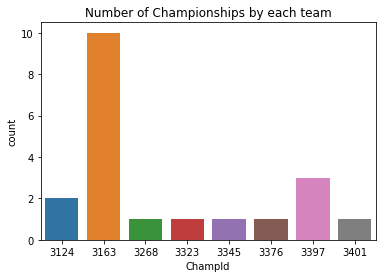

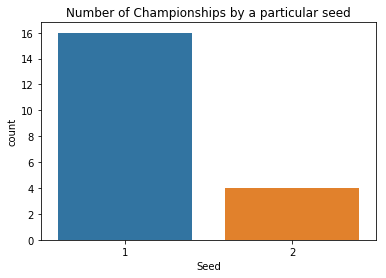

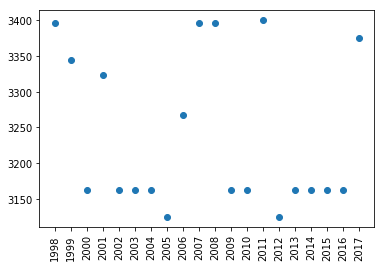

In [12]:
# number of times a team is won. The Team ID is given below
champs=pd.DataFrame(columns=['Season','ChampId','Seed'])
i=62
while(i<1260):
    champs.loc[i,'Season']=tourney_results['Season'][i]
    champs.loc[i,'ChampId']=tourney_results['WTeamID'][i]
    champs.loc[i,'Seed']=tourney_results['WSeed'][i]
    i=i+63


champs['Season']=champs['Season'].astype(int)
champs['ChampId']=champs['ChampId'].astype(int)
champs['Seed']=champs['Seed'].astype(int)

sns.countplot(champs['ChampId'])
plt.title("Number of Championships by each team")
plt.show()
sns.countplot(champs['Seed'])
plt.title("Number of Championships by a particular seed")
plt.show()
plt.scatter(x=champs['Season'],y=champs['ChampId'])
plt.xticks(champs['Season'],rotation=90)
plt.show()

In [13]:
# one more feature and that is number of times it won in the championship..
number_of_champion=pd.DataFrame()
number_of_champion['TeamID']=champs.loc[champs['Season']<=2013,'ChampId'].value_counts().index
number_of_champion['number']=champs.loc[champs['Season']<=2013,'ChampId'].value_counts().values

number_of_champion.rename(columns={'TeamID':'WTeamID','number':'Wnumber'},inplace=True)
df_dummy=pd.merge(left=tourney_results,right=number_of_champion,how='left',on=['WTeamID'])
number_of_champion.rename(columns={'WTeamID':'LTeamID','Wnumber':'Lnumber'},inplace=True)
tourney_results=pd.merge(left=df_dummy,right=number_of_champion,how='left',on=['LTeamID'])

tourney_results['Wnumber'].fillna(0,inplace=True)
tourney_results['Lnumber'].fillna(0,inplace=True)
tourney_results['Wnumber']=tourney_results['Wnumber'].astype(int)
tourney_results['Lnumber']=tourney_results['Lnumber'].astype(int)

tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,WRegion,LSeed,LRegion,W_NumberofWins_RS,L_NumberofWins_RS,Wav_pps,Wav_ppa,Lav_pps,Lav_ppa,Wnumber,Lnumber
0,1998,137,3104,94,3422,46,H,0,2,X,15,X,235,237,64.586481,65.900596,62.265347,63.702970,0,0
1,1998,137,3112,75,3365,63,H,0,3,W,14,W,266,256,68.726562,67.035156,66.643564,65.843564,0,0
2,1998,137,3163,93,3193,52,H,0,2,W,15,W,507,291,103.830189,67.101415,65.094949,63.967677,7,0
3,1998,137,3198,59,3266,45,H,0,7,Y,10,Y,294,307,67.678862,63.186992,68.854470,64.719335,0,0
4,1998,137,3203,74,3208,72,A,0,10,W,7,W,320,373,69.267782,63.041841,77.586134,65.386555,0,0


In [14]:
# number of times it went to tournament
c=pd.DataFrame()

c['TeamID']=tourney_seeds.loc[tourney_seeds['Season']<=2013,'TeamID'].value_counts().index
c['Count']=tourney_seeds.loc[tourney_seeds['Season']<=2013,'TeamID'].value_counts().values

c.rename(columns={'TeamID':'WTeamID','Count':'Wcount'},inplace=True)
df_dummy=pd.merge(left=tourney_results,right=c,how='left',on=['WTeamID'])
c.rename(columns={'WTeamID':'LTeamID','Wcount':'Lcount'},inplace=True)
tourney_results=pd.merge(left=df_dummy,right=c,how='left',on=['LTeamID'])

tourney_results['Wcount'].fillna(0,inplace=True)
tourney_results['Lcount'].fillna(0,inplace=True)

tourney_results['Wcount']=tourney_results['Wcount'].astype(int)
tourney_results['Lcount']=tourney_results['Lcount'].astype(int)

tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,WRegion,...,W_NumberofWins_RS,L_NumberofWins_RS,Wav_pps,Wav_ppa,Lav_pps,Lav_ppa,Wnumber,Lnumber,Wcount,Lcount
0,1998,137,3104,94,3422,46,H,0,2,X,...,235,237,64.586481,65.900596,62.265347,63.702970,0,0,2,1
1,1998,137,3112,75,3365,63,H,0,3,W,...,266,256,68.726562,67.035156,66.643564,65.843564,0,0,6,4
2,1998,137,3163,93,3193,52,H,0,2,W,...,507,291,103.830189,67.101415,65.094949,63.967677,7,0,16,2
3,1998,137,3198,59,3266,45,H,0,7,Y,...,294,307,67.678862,63.186992,68.854470,64.719335,0,0,3,6
4,1998,137,3203,74,3208,72,A,0,10,W,...,320,373,69.267782,63.041841,77.586134,65.386555,0,0,9,16


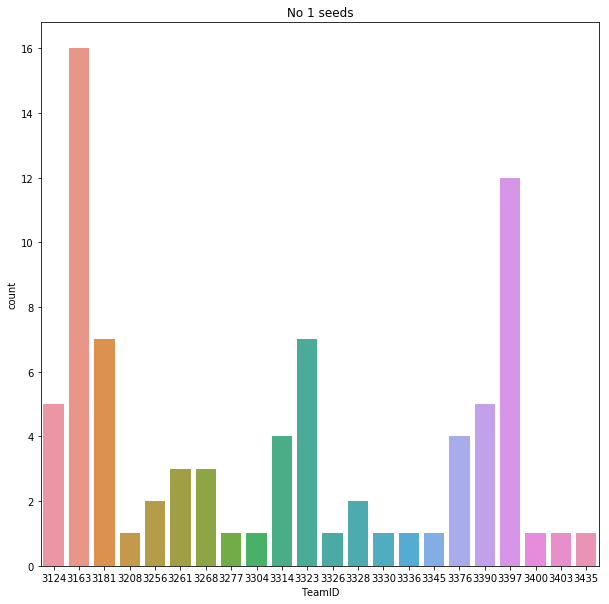

In [15]:
plt.subplots(figsize=(10,10))
seed_1=tourney_seeds.loc[tourney_seeds['seed_int']==1]
sns.countplot(seed_1['TeamID'])
plt.title("No 1 seeds")
plt.show()

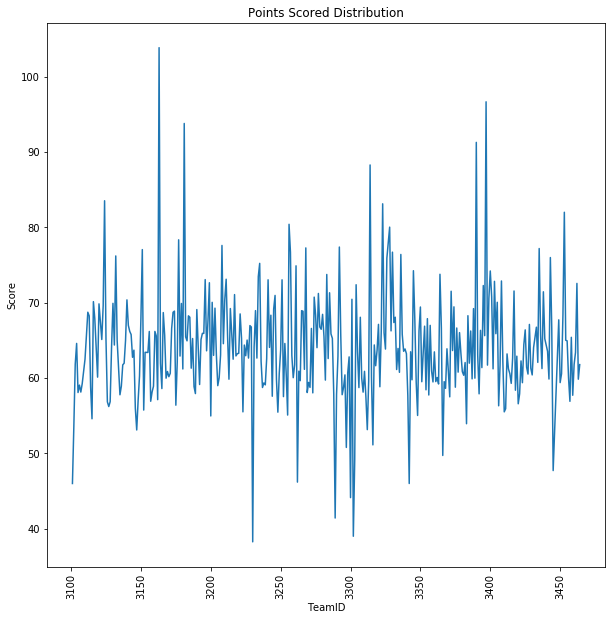

In [16]:
plt.subplots(figsize=(10,10))
plt.plot(temp['TeamID'],temp['av_pps'])
plt.xticks(rotation='90')
plt.xlabel("TeamID")
plt.ylabel("Score")
plt.title("Points Scored Distribution")
plt.show()

## making the data

In [17]:
pd.set_option('display.max_columns',22)
tourney_results.head(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,WRegion,LSeed,LRegion,W_NumberofWins_RS,L_NumberofWins_RS,Wav_pps,Wav_ppa,Lav_pps,Lav_ppa,Wnumber,Lnumber,Wcount,Lcount
0,1998,137,3104,94,3422,46,H,0,2,X,15,X,235,237,64.586481,65.900596,62.265347,63.702970,0,0,2,1
1,1998,137,3112,75,3365,63,H,0,3,W,14,W,266,256,68.726562,67.035156,66.643564,65.843564,0,0,6,4
2,1998,137,3163,93,3193,52,H,0,2,W,15,W,507,291,103.830189,67.101415,65.094949,63.967677,7,0,16,2
3,1998,137,3198,59,3266,45,H,0,7,Y,10,Y,294,307,67.678862,63.186992,68.854470,64.719335,0,0,3,6
4,1998,137,3203,74,3208,72,A,0,10,W,7,W,320,373,69.267782,63.041841,77.586134,65.386555,0,0,9,16
5,1998,137,3234,77,3269,59,H,0,4,Z,13,Z,305,191,73.456612,69.435950,58.068762,61.705305,0,0,11,1
6,1998,137,3242,72,3408,68,H,0,5,Z,12,Z,256,333,64.056641,63.382812,72.872068,66.490405,0,0,5,7
7,1998,137,3301,89,3263,64,H,0,4,W,13,W,304,232,70.445122,64.735772,60.905812,62.643287,0,0,9,4
8,1998,137,3304,76,3307,59,N,0,9,W,8,W,314,331,72.373984,66.987805,68.057851,60.462810,0,0,8,8
9,1998,137,3314,91,3224,71,H,0,2,Y,15,Y,415,255,88.265823,71.360759,64.371316,65.092338,0,0,14,2


In [18]:
wins=tourney_results.loc[tourney_results['Season']<=2013,['WSeed','LSeed','W_NumberofWins_RS','L_NumberofWins_RS','Wav_pps','Wav_ppa','Lav_pps','Lav_ppa','Wnumber','Lnumber','Wcount','Lcount']]

wins['SeedDiff']=wins['WSeed']-wins['LSeed']

wins['Regularseasondiff']=wins['W_NumberofWins_RS']-wins['L_NumberofWins_RS']

wins['ppsDiff']=wins['Wav_pps']-wins['Lav_pps']

wins['ppaDiff']=wins['Wav_ppa']-wins['Lav_ppa']

wins['ChampDiff']=wins['Wnumber']-wins['Lnumber']

wins['CountDiff']=wins['Wcount']-wins['Lcount']

wins.drop(columns=['WSeed','LSeed','W_NumberofWins_RS','L_NumberofWins_RS','Wav_pps','Wav_ppa','Lav_pps','Lav_ppa','Wnumber','Lnumber','Wcount','Lcount'],inplace=True)
wins['Result']=1
wins['Result']=wins['Result'].astype(int)
# wins.head()

losses=-wins
losses['Result']=0
# losses.head()

data=pd.concat([wins,losses],axis=0)
data.head()

,SeedDiff,Regularseasondiff,ppsDiff,ppaDiff,ChampDiff,CountDiff,Result
0,-13.0,-2.0,2.321135,2.197626,0.0,1.0,1
1,-11.0,10.0,2.082998,1.191592,0.0,2.0,1
2,-13.0,216.0,38.735239,3.133738,7.0,14.0,1
3,-3.0,-13.0,-1.175608,-1.532343,0.0,-3.0,1
4,3.0,-53.0,-8.318352,-2.344714,0.0,-7.0,1


## TEST DATA PREPROCESSING

In [19]:
test=pd.DataFrame(columns=['Season','WTeamID','LTeamID'])
for i in sample_submission.index:
    season,wid,lid=map(int,sample_submission['ID'][i].split("_"))
    test.loc[i,'Season']=season
    test.loc[i,'WTeamID']=wid
    test.loc[i,'LTeamID']=lid

test['Season']=test['Season'].astype(int)
test['WTeamID']=test['WTeamID'].astype(int)
test['LTeamID']=test['LTeamID'].astype(int)
test.head()

,Season,WTeamID,LTeamID
0,2014,3103,3107
1,2014,3103,3113
2,2014,3103,3119
3,2014,3103,3124
4,2014,3103,3140


In [20]:
test.head()

,Season,WTeamID,LTeamID
0,2014,3103,3107
1,2014,3103,3113
2,2014,3103,3119
3,2014,3103,3124
4,2014,3103,3140


In [21]:
regular_season_wins2.head()

,LTeamID,L_NumberofWins_RS
0,3163,507
1,3397,466
2,3181,454
3,3390,447
4,3453,423


In [22]:
df_dummy=pd.merge(left=test,right=winseeds,how='left',on=['Season','WTeamID'])
test=pd.merge(left=df_dummy,right=lossseeds,how='left',on=['Season','LTeamID'])

test.drop(columns=['WRegion','LRegion'],inplace=True)

df_dummy=pd.merge(left=test,right=ppa1,how='left',on=['WTeamID'])
test=pd.merge(left=df_dummy,right=ppa2,how='left',on=['LTeamID'])

df_dummy=pd.merge(left=test,right=regular_season_wins1,how='left',on=['WTeamID'])
test=pd.merge(left=df_dummy,right=regular_season_wins2,how='left',on=['LTeamID'])

number_of_champion.rename(columns={'LTeamID':'WTeamID','Lnumber':'Wnumber'},inplace=True)
df_dummy=pd.merge(left=test,right=number_of_champion,how='left',on=['WTeamID'])
number_of_champion.rename(columns={'WTeamID':'LTeamID','Wnumber':'Lnumber'},inplace=True)
test=pd.merge(left=df_dummy,right=number_of_champion,how='left',on=['LTeamID'])
test['Wnumber'].fillna(0,inplace=True)
test['Lnumber'].fillna(0,inplace=True)
test['Wnumber']=test['Wnumber'].astype(int)
test['Lnumber']=test['Lnumber'].astype(int)

c.rename(columns={'LTeamID':'WTeamID','Lcount':'Wcount'},inplace=True)
df_dummy=pd.merge(left=test,right=c,how='left',on=['WTeamID'])
c.rename(columns={'WTeamID':'LTeamID','Wcount':'Lcount'},inplace=True)
test=pd.merge(left=df_dummy,right=c,how='left',on=['LTeamID'])

test['Wcount'].fillna(0,inplace=True)
test['Lcount'].fillna(0,inplace=True)
test['Wcount']=test['Wcount'].astype(int)
test['Lcount']=test['Lcount'].astype(int)

test.head()

,Season,WTeamID,LTeamID,WSeed,LSeed,Wav_pps,Wav_ppa,Lav_pps,Lav_ppa,W_NumberofWins_RS,L_NumberofWins_RS,Wnumber,Lnumber,Wcount,Lcount
0,2014,3103,3107,13,15,61.820663,67.838207,58.132584,59.435955,178,192,0,0,0,2
1,2014,3103,3113,13,9,61.820663,67.838207,68.234568,62.709877,178,320,0,0,0,8
2,2014,3103,3119,13,13,61.820663,67.838207,60.112266,60.384615,178,246,0,0,0,1
3,2014,3103,3124,13,2,61.820663,67.838207,83.517021,67.004255,178,404,0,2,0,12
4,2014,3103,3140,13,12,61.820663,67.838207,70.364979,63.580169,178,336,0,0,0,6


In [23]:
test.drop(columns=['Season','WTeamID','LTeamID'],inplace=True)
test['SeedDiff']=test['WSeed']-test['LSeed']

test['Regularseasondiff']=test['W_NumberofWins_RS']-test['L_NumberofWins_RS']

test['ppsDiff']=test['Wav_pps']-test['Lav_pps']

test['ppaDiff']=test['Wav_ppa']-test['Lav_ppa']

test['ChampDiff']=test['Wnumber']-test['Lnumber']

test['CountDiff']=test['Wcount']-test['Lcount']

test.drop(columns=['WSeed','LSeed','W_NumberofWins_RS','L_NumberofWins_RS','Wav_pps','Wav_ppa','Lav_pps','Lav_ppa','Wnumber','Lnumber','Wcount','Lcount'],inplace=True)

test.head()

,SeedDiff,Regularseasondiff,ppsDiff,ppaDiff,ChampDiff,CountDiff
0,-2,-14,3.688078,8.402252,0,-2
1,4,-142,-6.413905,5.128330,0,-8
2,0,-68,1.708397,7.453591,0,-1
3,11,-226,-21.696359,0.833951,-2,-12
4,1,-158,-8.544316,4.258038,0,-6


# TRAINING

In [24]:
X_train=data.iloc[:,0:6]
y_train=data.iloc[:,6]
X_test=test.iloc[:,:]

# Shuffling and splitting the data
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,shuffle=True,random_state=42)


print("Training Shape",X_train.shape)
print("Training Label Shape",y_train.shape)
print("Validation Shape",X_val.shape)
print("Validation Label Shape",y_val.shape)
print("Test Shape",X_test.shape)

Training Shape (1814, 6)
Training Label Shape (1814,)
Validation Shape (202, 6)
Validation Label Shape (202,)
Test Shape (8064, 6)


## LOGISTIC REGRESSION

In [25]:
param={'C':[0.001,0.003,0.006,0.01,0.02,0.03,0.04,0.05,0.06,1,3,6,10]}
lr=LogisticRegression()
gridsearch=GridSearchCV(lr,param_grid=param,scoring='neg_log_loss',cv=5)
gridsearch.fit(X_train,y_train)
print("The Best C is",gridsearch.best_params_['C'])

The Best C is 0.01


In [26]:
lr=LogisticRegression(C=gridsearch.best_params_['C'])
lr.fit(X_train,y_train)
print("The Training Log loss is",log_loss(y_train,lr.predict_proba(X_train)[:,1]))
print("The Validation Log loss is",log_loss(y_val,lr.predict_proba(X_val)[:,1]))

The Training Log loss is 0.4396576125
The Validation Log loss is 0.441339838418


## RANDOM FOREST

In [27]:
param={'n_estimators':[5,10,20,30]}
rf=RandomForestClassifier()
gridsearch=GridSearchCV(rf,param_grid=param,scoring='neg_log_loss',cv=5)
gridsearch.fit(X_train,y_train)
print("The number of trees is",gridsearch.best_params_['n_estimators'])

The number of trees is 30


In [28]:
rf=RandomForestClassifier(n_estimators=gridsearch.best_params_['n_estimators'])
rf.fit(X_train,y_train)
print("The Training Log loss is",log_loss(y_train,rf.predict_proba(X_train)[:,1]))
print("The Validation Log loss is",log_loss(y_val,rf.predict_proba(X_val)[:,1]))

The Training Log loss is 0.131840103127
The Validation Log loss is 0.511124246551


## GRADIENT BOOSTED TREES

In [29]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print("The Training Log loss is",log_loss(y_train,xgb.predict_proba(X_train)[:,1]))
print("The Validation Log loss is",log_loss(y_val,xgb.predict_proba(X_val)[:,1]))

The Training Log loss is 0.384339746048
The Validation Log loss is 0.450712265493


In [30]:
xgb.predict_proba(X_test)[:,1][0:10]

array([ 0.56656623,  0.11847864,  0.28233463,  0.02276182,  0.13099226,
        0.12323453,  0.38191393,  0.01049415,  0.60148609,  0.12965849], dtype=float32)

## LOGISTIC REGRESSION AND GRADIENT BOOSTED TREES 

In [31]:
previous=pd.DataFrame(columns=sample_submission.columns)
previous['ID']=sample_submission.loc[0:2015,'ID']
previous['Pred']=sample_submission.loc[0:2015,'Pred']
previous['Pred']=xgb.predict_proba(X_test)[:,1][0:2016]
previous.tail()

,ID,Pred
2011,2014_3452_3457,0.988437
2012,2014_3452_3460,0.994510
2013,2014_3455_3457,0.547287
2014,2014_3455_3460,0.492672
2015,2014_3457_3460,0.539353


In [32]:
previous.to_csv("xgb_2014.csv",index=False)
print("Done")

Done


In [33]:
previous=pd.DataFrame(columns=sample_submission.columns)
previous['ID']=sample_submission.loc[0:2015,'ID']
previous['Pred']=sample_submission.loc[0:2015,'Pred']
previous['Pred']=lr.predict_proba(X_test)[:,1][0:2016]
previous.head()

,ID,Pred
0,2014_3103_3107,0.544614
1,2014_3103_3113,0.165341
2,2014_3103_3119,0.407011
3,2014_3103_3124,0.024363
4,2014_3103_3140,0.285890


In [34]:
previous.to_csv("lr_2014.csv",index=False)
print("Done")

Done


In [36]:
tourney_results.loc[tourney_results['Season']==2014].head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,WRegion,LSeed,LRegion,W_NumberofWins_RS,L_NumberofWins_RS,Wav_pps,Wav_ppa,Lav_pps,Lav_ppa,Wnumber,Lnumber,Wcount,Lcount
1008,2014,138,3113,69,3435,61,N,0,9,Z,8,Z,320,363,68.234568,62.709877,77.177686,65.737603,0,0,8,15
1009,2014,138,3124,87,3443,74,H,0,2,Z,15,Z,404,336,83.517021,67.004255,75.981557,69.915984,2,0,12,4
1010,2014,138,3140,72,3301,57,N,0,12,W,5,W,336,304,70.364979,63.580169,70.445122,64.735772,0,0,6,9
1011,2014,138,3143,64,3200,63,N,0,7,Z,10,Z,281,163,65.763052,63.524096,54.960784,60.686275,0,0,6,0
1012,2014,138,3177,104,3328,100,N,0,7,W,10,W,343,362,78.335404,70.252588,80.016667,70.479167,0,0,11,14


In [37]:
previous.loc[previous['ID']=='2014_3113_3435']

,ID,Pred
180,2014_3113_3435,0.390935


In [40]:
previous.loc[previous['ID']=='2014_3140_3301']

,ID,Pred
332,2014_3140_3301,0.180368
